In [1]:
%pip install transformers

   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.0 MB 465.6 kB/s eta 0:00:21
   -- ------------------------------------- 0.5/10.0 MB 465.6 kB/s eta 0:00:21
   -- ------------------------------------- 0.5/10.0 MB 465.6 kB/s eta 0:00:21
   --- ------------------------------------ 0.8/10.0 MB 447.3 kB/s eta 0:00:21
   --- ------------------------------------ 0.8/10.0 MB 447.3 kB/s eta 0:00:21
   ---- ----------------------------------- 1


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip install librosa numpy noisereduce scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import noisereduce as nr
import scipy.signal as signal


In [14]:

# Load Audio File
def load_audio(file_path, sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    return y, sr

# Noise Reduction using Spectral Gating
def reduce_noise(y, sr):
    reduced_noise = nr.reduce_noise(y=y, sr=sr, stationary=True)
    return reduced_noise

# Bandpass Filter (500Hz - 2000Hz for lung sounds)
def bandpass_filter(y, sr, lowcut=500, highcut=2000, order=5):
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_audio = signal.filtfilt(b, a, y)
    return filtered_audio
 
# Remove Silence
def remove_silence(y, sr, threshold=20):
    intervals = librosa.effects.split(y, top_db=threshold)
    non_silent_audio = np.concatenate([y[start:end] for start, end in intervals])
    return non_silent_audio

# Convert to Mel-Spectrogram
def extract_mel_spectrogram(y, sr, n_mels=128):
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

# Convert to MFCCs
def extract_mfcc(y, sr, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc

# Plot Mel-Spectrogram
def plot_mel_spectrogram(mel_spec_db, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Mel-Spectrogram")
    plt.show()


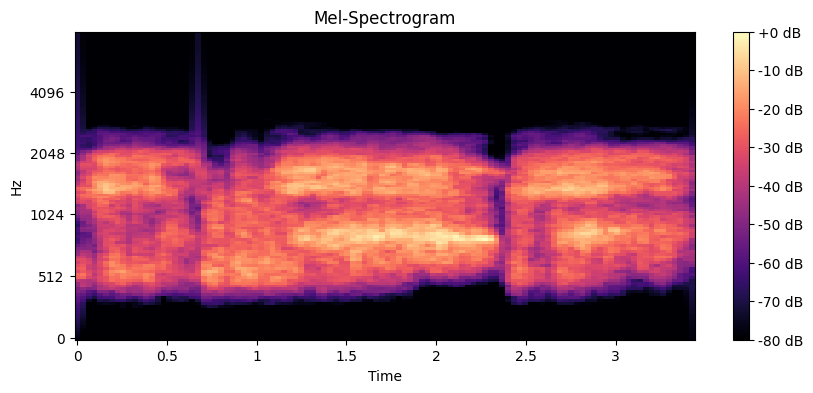

In [5]:

# Example Usage
file_path = "sounddr_data_passwordFPT_Software\\breathe_mouth\\bad_breathe_mouth_2021-08-01T15_19_10.946Z.wav" 
y, sr = load_audio(file_path)
y_denoised = reduce_noise(y, sr)
y_filtered = bandpass_filter(y_denoised, sr)
y_clean = remove_silence(y_filtered, sr)

mel_spectrogram = extract_mel_spectrogram(y_clean, sr)
mfcc_features = extract_mfcc(y_clean, sr)

plot_mel_spectrogram(mel_spectrogram, sr)


<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Blacksheep\AppData\Local\Temp\ipykernel_6944\490087174.py:1: SyntaxWarning: invalid escape sequence '\g'
  file_path = "sounddr_data_passwordFPT_Software\\breathe_mouth\good_breathe_mouth_2021-09-06T05_11_16.841Z.wav"


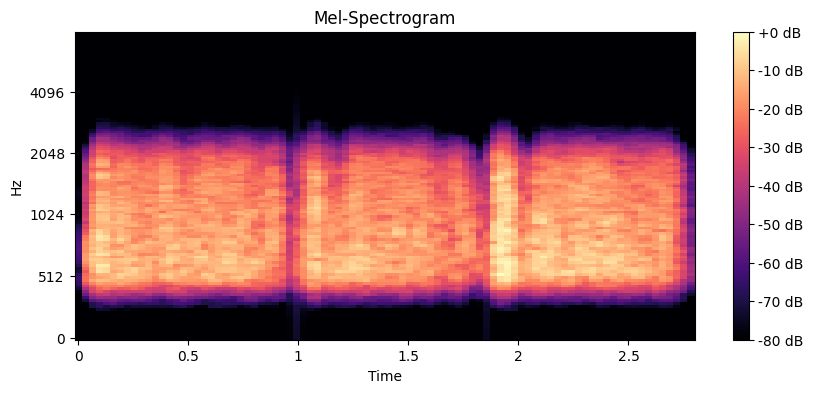

In [6]:
file_path = "sounddr_data_passwordFPT_Software\\breathe_mouth\good_breathe_mouth_2021-09-06T05_11_16.841Z.wav" 
y, sr = load_audio(file_path)
y_denoised = reduce_noise(y, sr)
y_filtered = bandpass_filter(y_denoised, sr)
y_clean = remove_silence(y_filtered, sr)

mel_spectrogram = extract_mel_spectrogram(y_clean, sr)
mfcc_features = extract_mfcc(y_clean, sr)

plot_mel_spectrogram(mel_spectrogram, sr)

In [11]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [12]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")
wav2vec_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base")


d:\IIT\Year 4\Final Year Project\implementations\.venv\Lib\site-packages\transformers\configuration_utils.py:315: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [9]:
import torch

# Preprocess the audio using the processor
input_values = processor(y_clean, sampling_rate=sr, return_tensors="pt", padding=True).input_values

# Pass the preprocessed audio through the Wav2Vec2 model
with torch.no_grad():
    embeddings = wav2vec_model(input_values).last_hidden_state

# embeddings now contains the audio embeddings
print(embeddings.shape)

torch.Size([1, 138, 768])


In [10]:
embeddings

tensor([[[-0.2834, -0.3454,  0.3935,  ...,  0.5593,  0.0088, -0.0293],
         [-0.3897, -0.3142,  0.3676,  ...,  0.4823,  0.1501,  0.0943],
         [-0.1158, -0.3595,  0.4396,  ...,  0.3331,  0.0566, -0.3151],
         ...,
         [-0.1251, -0.1944,  0.5365,  ..., -0.1723, -0.0243,  0.0137],
         [-0.2863, -0.1821,  0.3634,  ...,  0.0234, -0.1061, -0.2715],
         [-0.2201, -0.3353,  0.0202,  ...,  0.2534, -0.0202, -0.3729]]])

In [15]:
import os
import torch

def process_and_save_embeddings(input_dir, output_dir, processor, wav2vec_model, sr=16000):
    """
    Process audio files in a directory, extract embeddings, and save them to a new folder.

    Args:
        input_dir (str): Path to the directory containing audio files.
        output_dir (str): Path to the directory where embeddings will be saved.
        processor (Wav2Vec2Processor): Pretrained Wav2Vec2 processor.
        wav2vec_model (Wav2Vec2Model): Pretrained Wav2Vec2 model.
        sr (int): Sampling rate for audio processing.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                label = os.path.basename(root)  # Use folder name as label
                label_output_dir = os.path.join(output_dir, label)

                if not os.path.exists(label_output_dir):
                    os.makedirs(label_output_dir)

                # Load and process audio
                y, _ = load_audio(file_path, sr)
                y_denoised = reduce_noise(y, sr)
                y_filtered = bandpass_filter(y_denoised, sr)
                y_clean = remove_silence(y_filtered, sr)

                # Extract embeddings
                input_values = processor(y_clean, sampling_rate=sr, return_tensors="pt", padding=True).input_values
                with torch.no_grad():
                    embeddings = wav2vec_model(input_values).last_hidden_state

                # Save embeddings
                embedding_file = os.path.join(label_output_dir, f"{os.path.splitext(file)[0]}_embeddings.pt")
                torch.save(embeddings, embedding_file)

In [18]:
path_str="sounddr_data_passwordFPT_Software\\breathe_nose"
emb_path = "sounddr_data_passwordFPT_Software\\breathe_nose_embeddings"

In [19]:
process_and_save_embeddings(path_str, emb_path, processor, wav2vec_model, sr=16000)

In [ ]:
import os
import torch
import pandas as pd

def load_embeddings_to_dataframe(embedding_dir):
    """
    Load embeddings from a directory and store them in a pandas DataFrame.

    Args:
        embedding_dir (str): Path to the directory containing embedding files.

    Returns:
        pd.DataFrame: DataFrame containing embeddings and their corresponding file names.
    """
    data = []
    for root, _, files in os.walk(embedding_dir):
        for file in files:
            if file.endswith("_embeddings.pt"):
                file_path = os.path.join(root, file)
                embeddings = torch.load(file_path)
                data.append({
                    "file_name": file,
                    "embeddings": embeddings.numpy()
                })

    df = pd.DataFrame(data)
    return df

# Example usage
embedding_dir = "path_to_embedding_directory"
embedding_df = load_embeddings_to_dataframe(embedding_dir)
print(embedding_df.head())